In [1]:
%cd ~/PycharmProjects/muse
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import numpy as np

/Users/suneelbelkhale/PycharmProjects/muse


In [3]:
# show the state diversity needed?

def plot_2d_state_heatmap(data, t1=None, t2=None, xy_key='ego', done_key='done', n_bins=30, vmax=1000, log=True):
    xy = data[xy_key]

    if t1 is None:
        partial_xy = xy
    else:
        splits = data[done_key].nonzero()[0][:-1] + 1
        episodes = np.split(xy, splits, axis=0)
        if t2 is None:
            partial_xy = np.concatenate([ep[t1:] for ep in episodes])
        else:
            partial_xy = np.concatenate([ep[t1:t2] for ep in episodes])

    x, y = partial_xy[..., 0], partial_xy[..., 1]
    
    if log:
#         norm = colors.LogNorm(vmin=1, vmax=vmax+1)
        norm = colors.FuncNorm((lambda v: np.log(v + 1) / np.log(vmax + 1), lambda v: np.exp(v*np.log(vmax+1))),
                               vmin=0, vmax=vmax)
    else:
        norm = None
        
    plt.hist2d(x, y, bins=(n_bins, n_bins), cmap=plt.cm.jet, range=[[0,1], [0,1]], 
                       norm=norm)
    plt.colorbar()
    plt.show()

Loading pm_direct_1000ep.npz


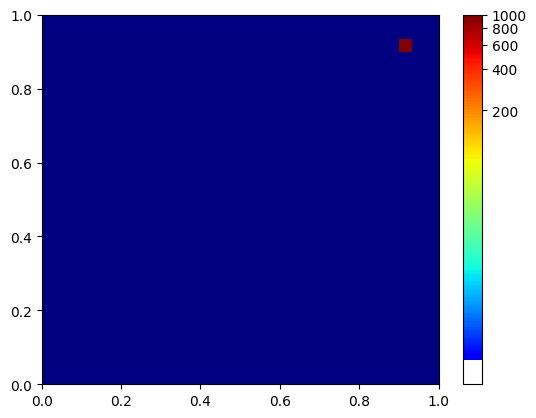

In [38]:
name = 'pm_direct_1000ep.npz'
file = f'experiments/pmhvs/collection/{name}'
print("Loading", name)
plot_2d_state_heatmap(dict(np.load(file, allow_pickle=True)), t1=-1)

Loading pm_direct_1000ep.npz


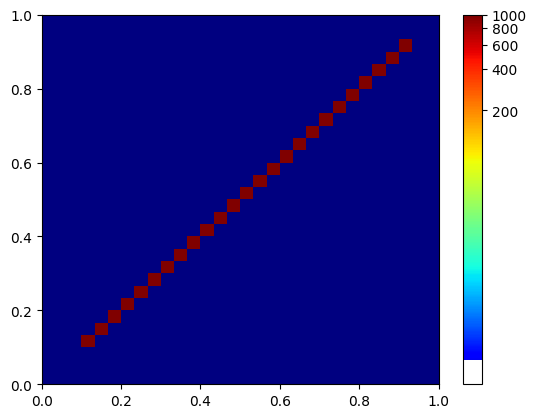

Loading all_pm_direct_sn0_01_1000ep.npz


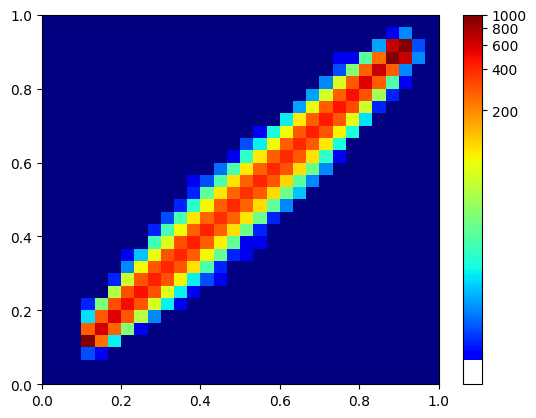

Loading all_pm_direct_sn0_02_1000ep.npz


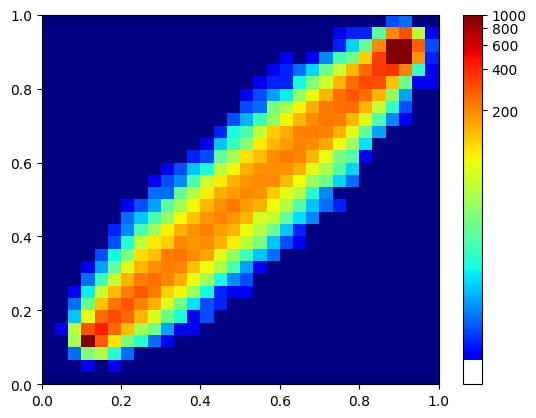

Loading all_pm_direct_sn0_03_1000ep.npz


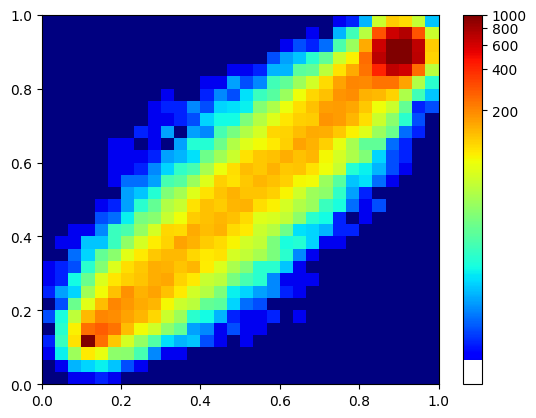

Loading all_pm_direct_sn0_05_1000ep.npz


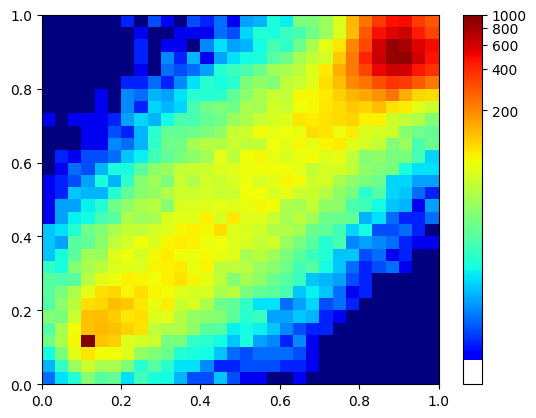

In [39]:
names = [
    'pm_direct_1000ep.npz',
    'all_pm_direct_sn0_01_1000ep.npz',
    'all_pm_direct_sn0_02_1000ep.npz',
    'all_pm_direct_sn0_03_1000ep.npz',
    'all_pm_direct_sn0_05_1000ep.npz',
]
for name in names:
    file = f'experiments/pmhvs/collection/{name}'
    print("Loading", name)
    plot_2d_state_heatmap(dict(np.load(file, allow_pickle=True)), t1=None)

Loading pm_direct_1000ep.npz


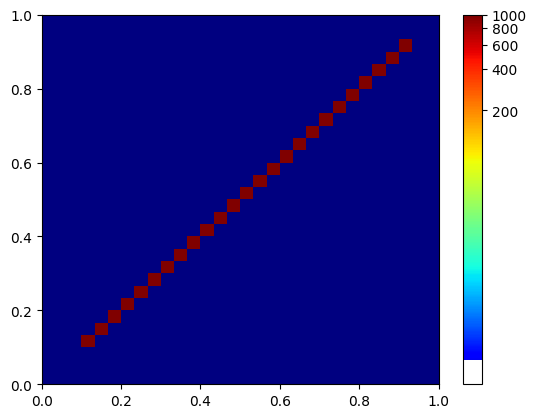

Loading all_pm_direct_speed0_75_sn0_01_1000ep.npz


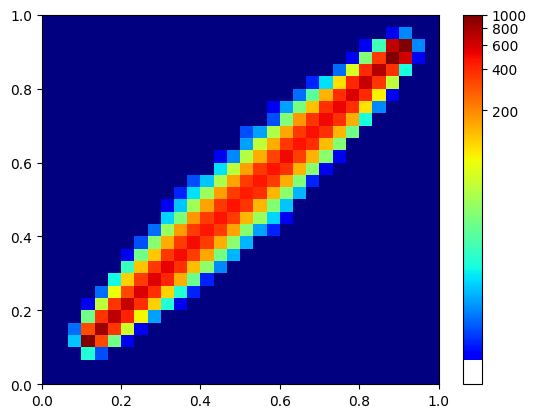

Loading all_pm_direct_speed0_75_sn0_02_1000ep.npz


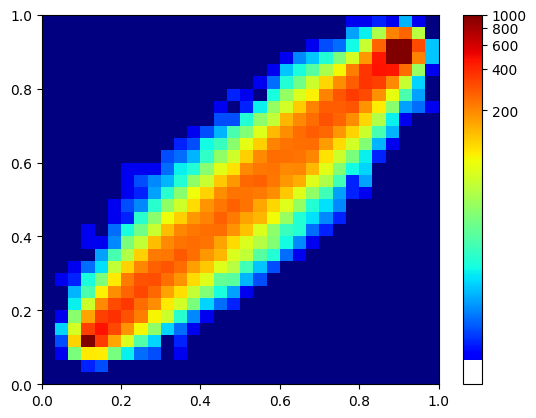

Loading all_pm_direct_speed0_75_sn0_03_1000ep.npz


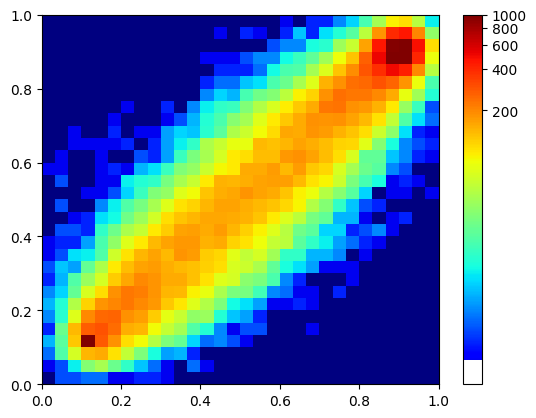

Loading all_pm_direct_speed0_75_sn0_05_1000ep.npz


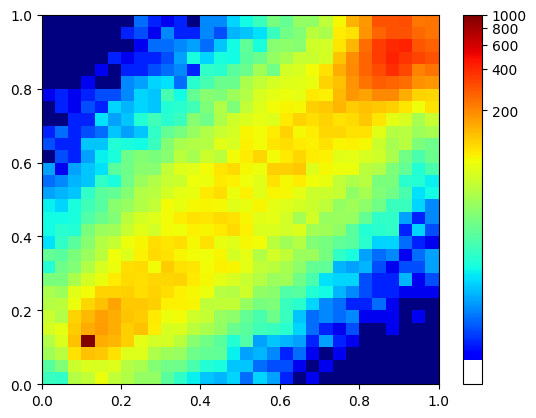

In [40]:
names = [
    'pm_direct_1000ep.npz',
    'all_pm_direct_speed0_75_sn0_01_1000ep.npz',
    'all_pm_direct_speed0_75_sn0_02_1000ep.npz',
    'all_pm_direct_speed0_75_sn0_03_1000ep.npz',
    'all_pm_direct_speed0_75_sn0_05_1000ep.npz',
]
for name in names:
    file = f'experiments/pmhvs/collection/{name}'
    print("Loading", name)
    plot_2d_state_heatmap(dict(np.load(file, allow_pickle=True)), t1=None)

Loading pm_direct_1000ep.npz


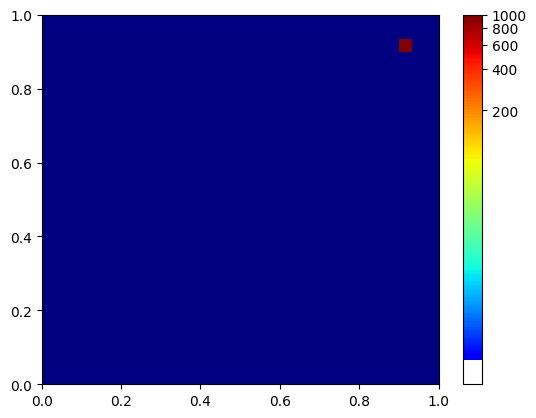

Loading all_pm_direct_sn0_01_1000ep.npz


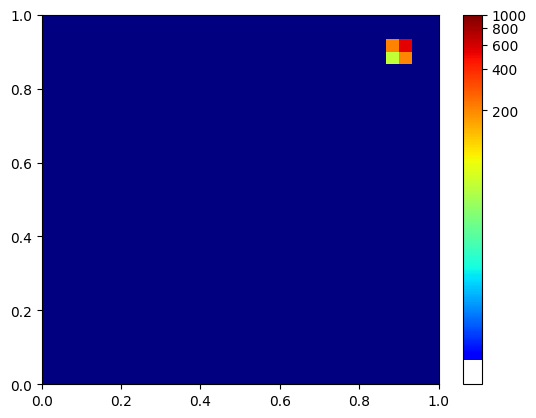

Loading all_pm_direct_sn0_02_1000ep.npz


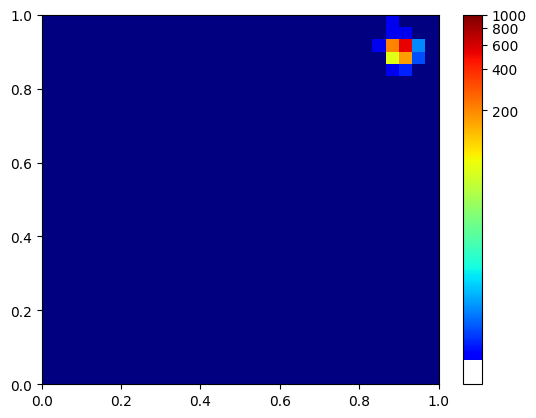

Loading all_pm_direct_sn0_03_1000ep.npz


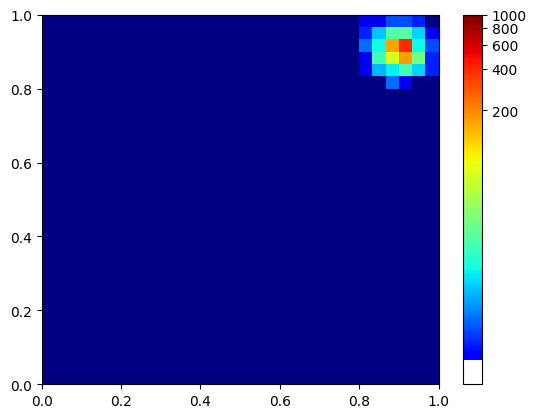

Loading all_pm_direct_sn0_05_1000ep.npz


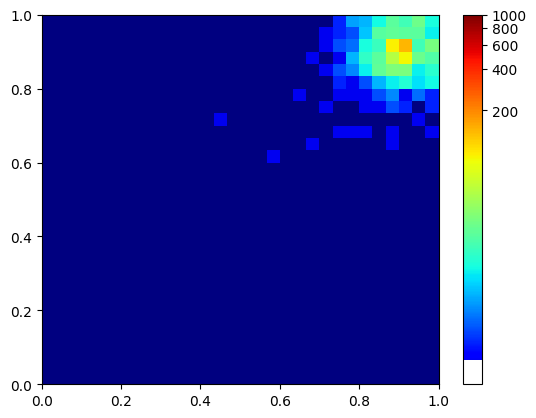

In [43]:
names = [
    'pm_direct_1000ep.npz',
    'all_pm_direct_sn0_01_1000ep.npz',
    'all_pm_direct_sn0_02_1000ep.npz',
    'all_pm_direct_sn0_03_1000ep.npz',
    'all_pm_direct_sn0_05_1000ep.npz',
]
for name in names:
    file = f'experiments/pmhvs/collection/{name}'
    print("Loading", name)
    plot_2d_state_heatmap(dict(np.load(file, allow_pickle=True)), t1=-1)

Loading pm_direct_1000ep.npz


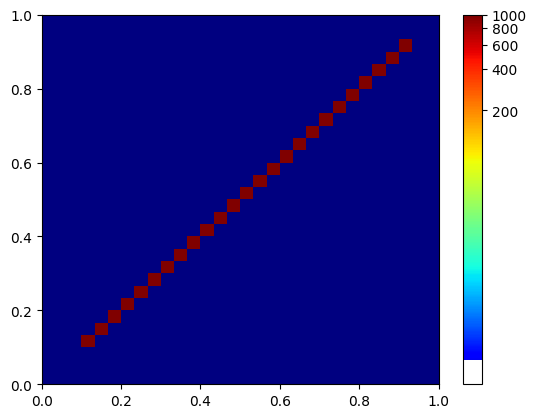

Loading all_pm_direct_speed0_75_sn0_01_1000ep.npz


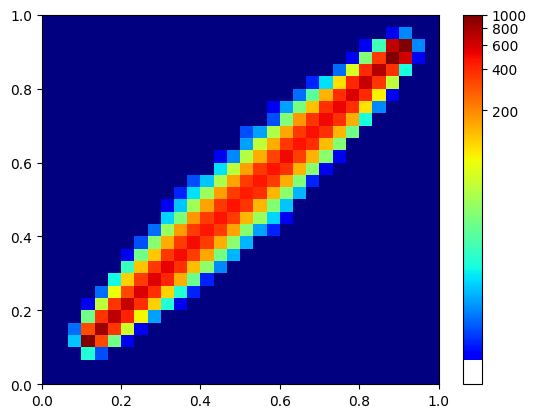

Loading all_pm_direct_speed0_75_sn0_02_1000ep.npz


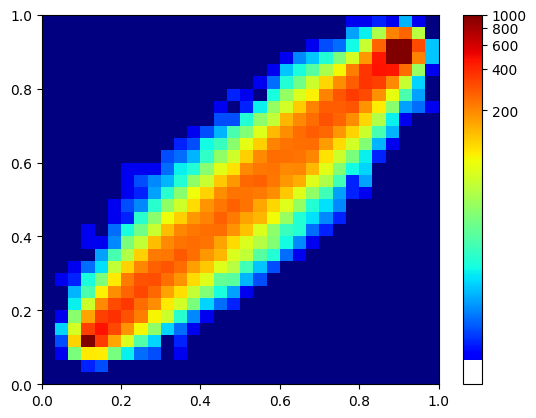

Loading all_pm_direct_speed0_75_sn0_03_1000ep.npz


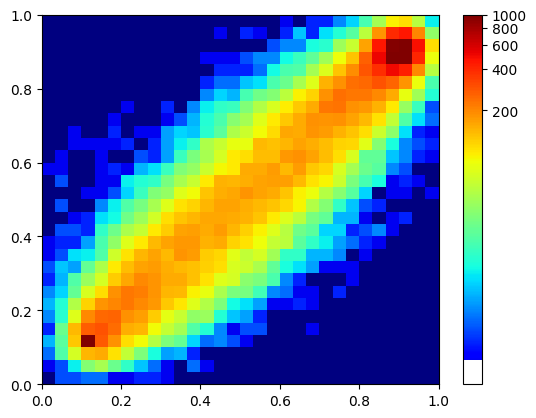

Loading all_pm_direct_speed0_75_sn0_05_1000ep.npz


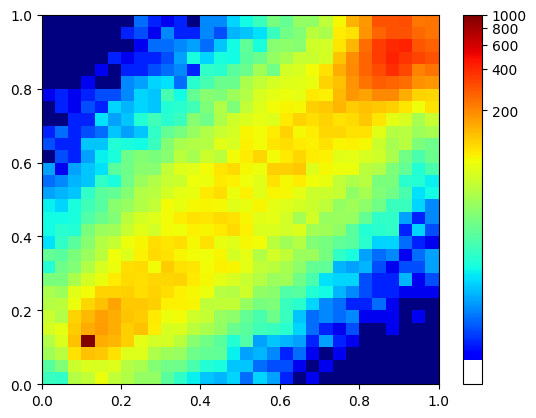

In [45]:
names = [
    'pm_direct_1000ep.npz',
    'all_pm_direct_speed0_75_sn0_01_1000ep.npz',
    'all_pm_direct_speed0_75_sn0_02_1000ep.npz',
    'all_pm_direct_speed0_75_sn0_03_1000ep.npz',
    'all_pm_direct_speed0_75_sn0_05_1000ep.npz',
]
for name in names:
    file = f'experiments/pmhvs/collection/{name}'
    print("Loading", name)
    plot_2d_state_heatmap(dict(np.load(file, allow_pickle=True)), t1=None)

# POLICY NOISE

Loading pm_direct_pn0_01_1000ep.npz


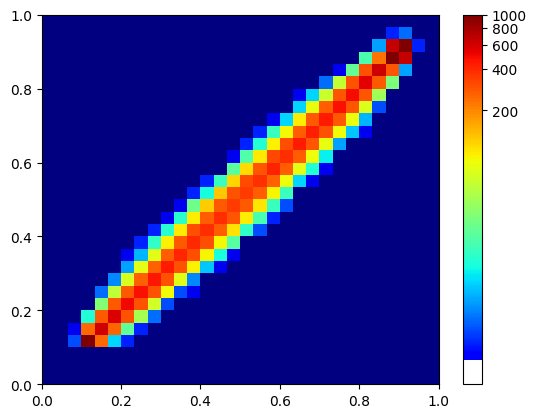

Loading pm_direct_pn0_02_1000ep.npz


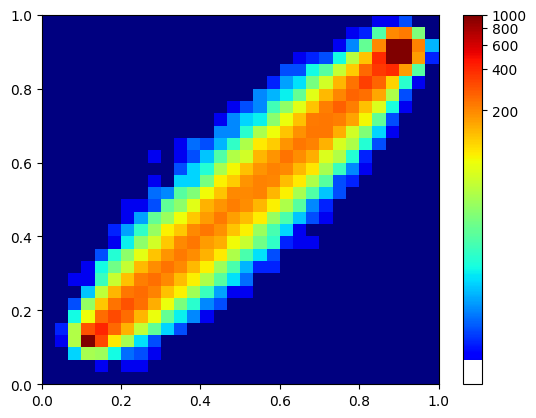

Loading pm_direct_pn0_03_1000ep.npz


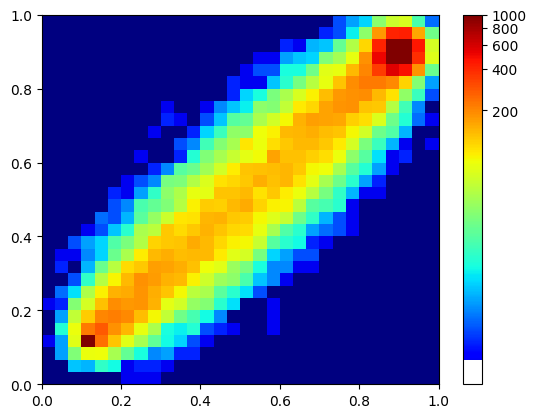

Loading pm_direct_pn0_04_1000ep.npz


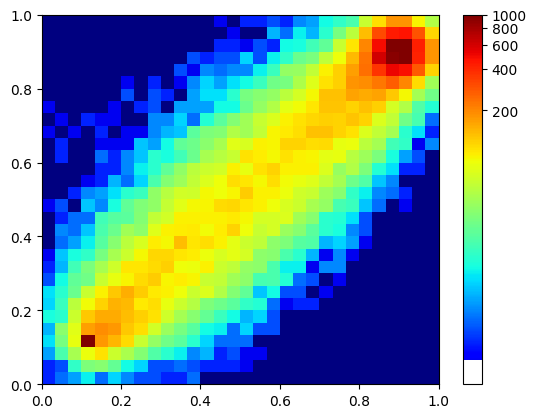

Loading pm_direct_pn0_05_1000ep.npz


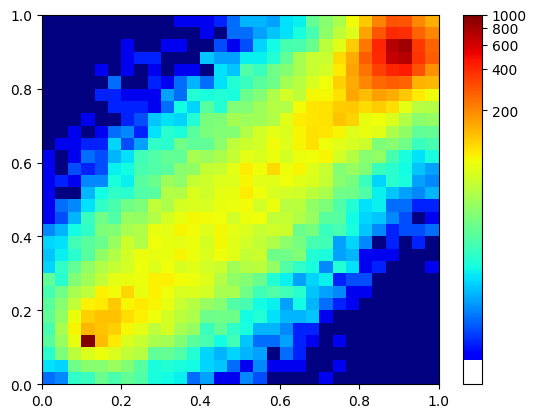

In [5]:
names = [
    'pm_direct_pn0_01_1000ep.npz',
    'pm_direct_pn0_02_1000ep.npz',
    'pm_direct_pn0_03_1000ep.npz',
    'pm_direct_pn0_04_1000ep.npz',
    'pm_direct_pn0_05_1000ep.npz',
]
for name in names:
    file = f'experiments/pmhvs/collection/{name}'
    print("Loading", name)
    plot_2d_state_heatmap(dict(np.load(file, allow_pickle=True)), t1=None)

# LEARNED

In [17]:
def compute_success_rate(path, num_rollouts):
    data = dict(np.load(path, allow_pickle=True))
    splits = np.nonzero(data['done'])[0][:-1] + 1
    rew_chunks = np.split(data['reward'].reshape(-1), splits)
    assert len(rew_chunks) == num_rollouts, len(rew_chunks)
    each_return = np.array([np.max(rews) for rews in rew_chunks])
    return np.mean(each_return)
    

In [26]:
# extract success rates for each set of rollouts
import os
from configs.utils import hr_name

def print_success(noise_type='s', prefix="best_", num_rollouts=100):

    s_noises = [0.01, 0.02, 0.03, 0.04, 0.05]
    dset_suffs = ['', '-first100', '-first50']

    for suff in dset_suffs:
        success = np.empty((len(s_noises), len(s_noises)), dtype=np.float32)
        for i, s in enumerate(s_noises):
            noise = f"{noise_type}n{hr_name(s)}"

            exp_name = f'experiments/pmhvs/velact_b256_h10_pm_direct_{noise}_1000ep{suff}_bc-l2_mlp200-d2'
            for j, es in enumerate(s_noises):
                file = f"{prefix}eval{num_rollouts}_{noise_type}n{hr_name(es)}.npz"

                path = f"{exp_name}/{file}"
                assert os.path.exists(path), path
                success[i, j] = compute_success_rate(path, num_rollouts)

        print(f"Success for suff='{suff}'...")
        print(success)
        print('------------------------------')


In [27]:
print('SYSTEM NOISE')
print_success(noise_type='s', prefix='best_')
print('\nPOLICY NOISE')
print_success(noise_type='p', prefix='best_')

SYSTEM NOISE
Success for suff=''...
[[1.   0.93 0.73 0.34 0.22]
 [1.   0.88 0.66 0.41 0.25]
 [1.   0.87 0.69 0.43 0.16]
 [1.   0.94 0.67 0.36 0.29]
 [1.   0.92 0.72 0.32 0.28]]
------------------------------
Success for suff='-first100'...
[[1.   0.94 0.61 0.41 0.23]
 [1.   0.92 0.59 0.38 0.34]
 [1.   0.97 0.56 0.44 0.2 ]
 [1.   0.91 0.63 0.42 0.19]
 [1.   0.94 0.71 0.38 0.27]]
------------------------------
Success for suff='-first50'...
[[1.   0.9  0.58 0.37 0.15]
 [1.   0.94 0.64 0.38 0.34]
 [1.   0.97 0.64 0.4  0.28]
 [1.   0.91 0.65 0.33 0.26]
 [1.   0.96 0.75 0.45 0.33]]
------------------------------

POLICY NOISE
Success for suff=''...
[[1.   0.95 0.55 0.41 0.23]
 [1.   0.92 0.65 0.45 0.35]
 [1.   0.88 0.61 0.44 0.24]
 [1.   0.93 0.63 0.4  0.27]
 [1.   0.94 0.69 0.39 0.19]]
------------------------------
Success for suff='-first100'...
[[1.   0.91 0.59 0.38 0.27]
 [1.   0.95 0.63 0.44 0.29]
 [1.   0.95 0.63 0.37 0.23]
 [1.   0.91 0.66 0.35 0.21]
 [1.   0.96 0.71 0.44 0.34]]
---

In [28]:
print('SYSTEM NOISE')
print_success(noise_type='s', prefix='')
print('\nPOLICY NOISE')
print_success(noise_type='p', prefix='')

SYSTEM NOISE
Success for suff=''...
[[1.   0.97 0.72 0.38 0.27]
 [1.   0.91 0.67 0.44 0.28]
 [1.   0.9  0.62 0.4  0.26]
 [1.   0.98 0.65 0.48 0.26]
 [1.   0.93 0.59 0.56 0.32]]
------------------------------
Success for suff='-first100'...
[[1.   0.9  0.57 0.4  0.24]
 [1.   0.97 0.68 0.36 0.32]
 [1.   0.88 0.68 0.39 0.26]
 [1.   0.93 0.63 0.42 0.2 ]
 [1.   0.97 0.64 0.4  0.24]]
------------------------------
Success for suff='-first50'...
[[1.   0.91 0.53 0.38 0.23]
 [1.   0.93 0.71 0.4  0.22]
 [1.   0.92 0.71 0.32 0.23]
 [1.   0.93 0.6  0.38 0.24]
 [1.   0.93 0.66 0.38 0.27]]
------------------------------

POLICY NOISE
Success for suff=''...
[[1.   0.94 0.74 0.39 0.2 ]
 [1.   0.96 0.61 0.44 0.23]
 [1.   0.94 0.71 0.48 0.27]
 [1.   0.91 0.7  0.38 0.29]
 [1.   0.95 0.65 0.41 0.32]]
------------------------------
Success for suff='-first100'...
[[1.   0.92 0.62 0.43 0.27]
 [1.   0.87 0.67 0.44 0.23]
 [1.   0.92 0.63 0.32 0.2 ]
 [1.   0.93 0.67 0.43 0.29]
 [1.   0.95 0.66 0.46 0.3 ]]
---

In [35]:
# success rate for scripted policy, system noise datasets (50 step max)
fs = [
    'all_pm_direct_sn0_01_1000ep.npz',
    'all_pm_direct_sn0_02_1000ep.npz',
    'all_pm_direct_sn0_03_1000ep.npz',
#     'all_pm_direct_sn0_04_1000ep.npz',
    'all_pm_direct_sn0_05_1000ep.npz',
]
for f in fs:
    print(f, compute_success_rate(f'experiments/pmhvs/collection/{f}', 1000))

all_pm_direct_sn0_01_1000ep.npz 1.0
all_pm_direct_sn0_02_1000ep.npz 0.927
all_pm_direct_sn0_03_1000ep.npz 0.648
all_pm_direct_sn0_05_1000ep.npz 0.236


In [38]:
# success rate for scripted policy, policy noise datasets (50 step max)
fs = [
    'all_pm_direct_pn0_01_1000ep.npz',
    'all_pm_direct_pn0_02_1000ep.npz',
    'all_pm_direct_pn0_03_1000ep.npz',
    'all_pm_direct_pn0_04_1000ep.npz',
    'all_pm_direct_pn0_05_1000ep.npz',
]
for f in fs:
    print(f, compute_success_rate(f'experiments/pmhvs/collection/{f}', 1000))

all_pm_direct_pn0_01_1000ep.npz 1.0
all_pm_direct_pn0_02_1000ep.npz 0.931
all_pm_direct_pn0_03_1000ep.npz 0.658
all_pm_direct_pn0_04_1000ep.npz 0.395
all_pm_direct_pn0_05_1000ep.npz 0.252


In [39]:
# success rate for scripted policy, policy noise datasets (100 step max)
fs = [
    'all_pm_direct_pn0_01_ns100_1000ep.npz',
    'all_pm_direct_pn0_02_ns100_1000ep.npz',
    'all_pm_direct_pn0_03_ns100_1000ep.npz',
    'all_pm_direct_pn0_04_ns100_1000ep.npz',
    'all_pm_direct_pn0_05_ns100_1000ep.npz',
]
for f in fs:
    print(f, compute_success_rate(f'experiments/pmhvs/collection/{f}', 1000))

all_pm_direct_pn0_01_ns100_1000ep.npz 1.0
all_pm_direct_pn0_02_ns100_1000ep.npz 1.0
all_pm_direct_pn0_03_ns100_1000ep.npz 0.975
all_pm_direct_pn0_04_ns100_1000ep.npz 0.813
all_pm_direct_pn0_05_ns100_1000ep.npz 0.647


In [41]:
# num steps 100
print('SYSTEM NOISE')
print_success(noise_type='s')
print('\nPOLICY NOISE')
print_success(noise_type='p')

SYSTEM NOISE
Success for suff=''...
[[1.   1.   0.84 0.69 0.45]
 [1.   1.   0.89 0.74 0.52]
 [1.   1.   0.88 0.7  0.52]
 [1.   1.   0.91 0.68 0.43]
 [1.   1.   0.86 0.65 0.51]]
------------------------------
Success for suff='-first100'...
[[1.   1.   0.87 0.74 0.49]
 [1.   1.   0.92 0.75 0.48]
 [1.   1.   0.91 0.76 0.39]
 [1.   1.   0.87 0.73 0.53]
 [1.   1.   0.91 0.59 0.59]]
------------------------------
Success for suff='-first50'...
[[1.   1.   0.85 0.65 0.38]
 [1.   1.   0.9  0.74 0.4 ]
 [1.   1.   0.93 0.63 0.42]
 [1.   1.   0.91 0.69 0.39]
 [1.   1.   0.88 0.63 0.51]]
------------------------------

POLICY NOISE
Success for suff=''...
[[1.   0.95 0.55 0.41 0.23]
 [1.   0.92 0.65 0.45 0.35]
 [1.   0.88 0.61 0.44 0.24]
 [1.   0.93 0.63 0.4  0.27]
 [1.   0.94 0.69 0.39 0.19]]
------------------------------
Success for suff='-first100'...
[[1.   0.91 0.59 0.38 0.27]
 [1.   0.95 0.63 0.44 0.29]
 [1.   0.95 0.63 0.37 0.23]
 [1.   0.91 0.66 0.35 0.21]
 [1.   0.96 0.71 0.44 0.34]]
---

# Without Data Bias

In [42]:
# success rate for scripted policy, policy noise datasets (500 step max)
fs = [
    'all_pm_direct_sn0_01_ns500_1000ep.npz',
    'all_pm_direct_sn0_02_ns500_1000ep.npz',
    'all_pm_direct_sn0_03_ns500_1000ep.npz',
    'all_pm_direct_sn0_04_ns500_1000ep.npz',
    'all_pm_direct_sn0_05_ns500_1000ep.npz',
    'all_pm_direct_pn0_01_ns500_1000ep.npz',
    'all_pm_direct_pn0_02_ns500_1000ep.npz',
    'all_pm_direct_pn0_03_ns500_1000ep.npz',
    'all_pm_direct_pn0_04_ns500_1000ep.npz',
    'all_pm_direct_pn0_05_ns500_1000ep.npz',
]
for f in fs:
    print(f, compute_success_rate(f'experiments/pmhvs/collection/{f}', 1000))

all_pm_direct_sn0_01_ns500_1000ep.npz 1.0
all_pm_direct_sn0_02_ns500_1000ep.npz 1.0
all_pm_direct_sn0_03_ns500_1000ep.npz 1.0
all_pm_direct_sn0_04_ns500_1000ep.npz 1.0
all_pm_direct_sn0_05_ns500_1000ep.npz 0.999
all_pm_direct_pn0_01_ns500_1000ep.npz 1.0
all_pm_direct_pn0_02_ns500_1000ep.npz 1.0
all_pm_direct_pn0_03_ns500_1000ep.npz 1.0
all_pm_direct_pn0_04_ns500_1000ep.npz 1.0
all_pm_direct_pn0_05_ns500_1000ep.npz 0.999
